# Using K-Means to Classify and Make Predictions

K-means in an unsupervised, classification algorithm. The goal of the algorithm is to group together similar data points and predict the labels of new points based on which group they most closely resemble. In this program we will employ the k-means algorithm on a simple dataset which consists of three obvious clusters. 

We begin by reading in the data, identifying the two features and plotting.

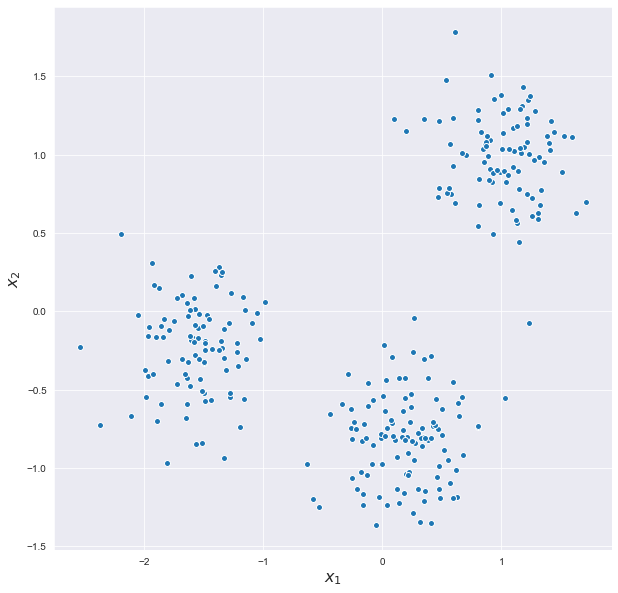

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

# import the data from file and split into x and y arrays
infile = open('KMeans_data.txt')
x1 = []
x2 = []
for line in infile:
    data = line.split()
    x1.append(float(data[0]))
    x2.append(float(data[1]))
# convert to numpy arrays
x1 = np.asarray(x_data)
x2 = np.asarray(y_data)
# combine x and y arrays
all_data = np.stack((x1, x2), axis = 1)

# plot the data to view point distribution
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(x1, x2, edgecolor = 'white')
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
plt.show()

From the plot we can identify three clusters. The first step in the k-means clustering algorithm is to randomly initialise three points known as the cluster centroids. The distance between each data point and the cluster centroids is measured, and then each point is assigned to the nearest centroid. For each centroid, the mean position of all the points that have been assigned to it is determined and the centroid is moved to this new position. The process repeats; the distances between each data point and the cluster centroids are once again measured, with points being reassigned to the nearest centroid. The centroids are moved to the mean positions of all their respective points. We keep going until a stopping point is reached, and hopefully the centroid is centrally located within its cluster. When we make predicitions on a new data point, the distance between the point and each centroid is measured, and the point is assigned to the nearest one.

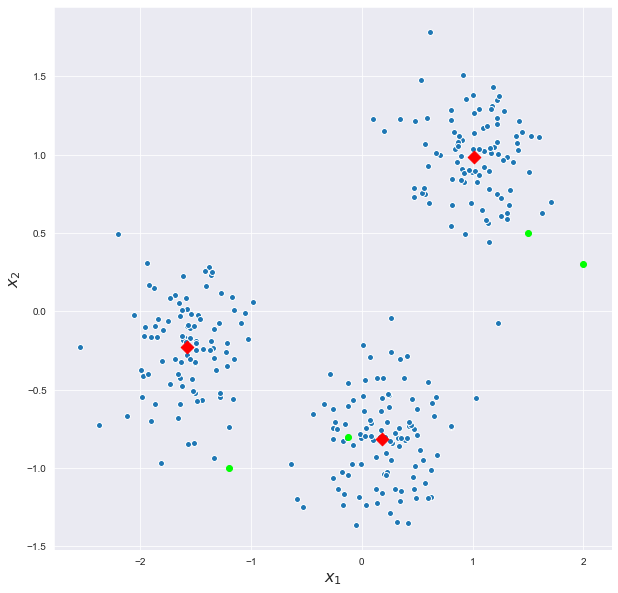

In [28]:
# instantiate a KMeans cluster instance with 3 clusters
model = KMeans(n_clusters = 3)
# fit model to data points
model.fit(all_data)
# find the cluster centroids
centroids = model.cluster_centers_
# x coordinates of centroids
centroids_x = centroids[:,0]
# y coordinates of centroids
centroids_y = centroids[:,1]

# define new points
new_points = np.array([-1.2, -1, 1.5, 0.5, 2, 0.3, -0.12, -0.8]).reshape(4, 2)
# predict cluster labels of new points
labels = model.predict(new_points)

# produce plot of points, centroids and new points (in green)
fig2 = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot(111)
ax2.scatter(x1, x2, edgecolor = 'white')
ax2.set_xlabel(r'$x_1$', fontsize = 16)
ax2.set_ylabel(r'$x_2$', fontsize = 16)
ax2.scatter(centroids_x, centroids_y, marker = 'D', color = 'r', s = 80)
ax2.scatter(new_points[:, 0], new_points[:, 1], color = 'lime')
plt.show()

Let's see explicitly which label the new points are predicted.

In [48]:
# generate basic table
print('  x       y   label')
print('----------------------')
for i in [0, 3]:
    print('{:.1f}    {:.1f}    {}'.format(new_points[i][0], new_points[i][1], labels[i]))
for j in [1, 2]:
    print(' {:.1f}     {:.1f}    {}'.format(new_points[j][0], new_points[j][1], labels[j]))
    
    

  x       y   label
----------------------
-1.2    -1.0    1
-0.1    -0.8    2
 1.5     0.5    0
 2.0     0.3    0


To finish off we will try to determine if three clusters was actually the correct choice for the model. Would performance have been better with more or fewer clusters? The inertia is the sum of distances between a centroid and all the data points in its cluster. For optimal model performance the points in a cluster should be similar, so the k-means algorithm looks to minimise inertia. Let's plot the inertia in the model for a variety of cluster numbers.

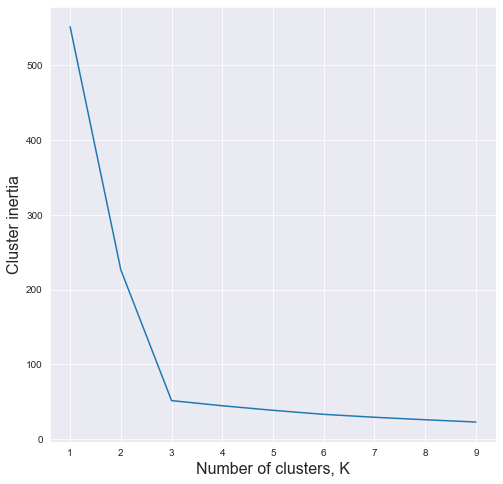

In [51]:
# identify the optimum number of clusters for model
# generate plot
fig3 = plt.figure(figsize = (8, 8))
ax3 = fig3.add_subplot(111)

# try k from 1 to 10
k_vals = range(1, 10)
inertias = []
# for each k...
for k in k_vals:
    # instantiate model with k clusters
    model2 = KMeans(n_clusters = k)
    # fit model to data
    model2.fit(all_data)
    # append the inertia measure of cluster grouping to the list 'inertias'
    inertias.append(model2.inertia_)

# add inertias to plot
ax3.plot(k_vals, inertias)
ax3.set_xlabel('Number of clusters, K', fontsize = 16)
ax3.set_ylabel('Cluster inertia', fontsize = 16)
plt.show()

From the plot and using the elbow-method, we judge that three clusters was the correct choice for the data. The inertia actually decreases as more clusters are used, but using larger numbers of clusters will result in over-fitting. 